In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('interview_no_show_dataset.csv')

# 1. Exploratory Data Analysis

### A. BASIC INFO

In [4]:
# 1. Basic info
print(df.shape)

(1500, 11)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_role              1500 non-null   object 
 1   experience            1500 non-null   float64
 2   notice_period         1500 non-null   int64  
 3   interview_time        1500 non-null   object 
 4   past_reschedules      1500 non-null   int64  
 5   current_company_size  1500 non-null   object 
 6   candidate_location    1500 non-null   object 
 7   communication_score   1500 non-null   float64
 8   expected_salary       1500 non-null   int64  
 9   scheduled_day_gap     1500 non-null   int64  
 10  no_show               1500 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 129.0+ KB
None


In [6]:
print(df.describe())

        experience  notice_period  past_reschedules  communication_score  \
count  1500.000000    1500.000000       1500.000000          1500.000000   
mean      4.977667      41.030000          0.543333             5.592867   
std       2.886138      21.368048          0.863686             2.589090   
min       0.000000      15.000000          0.000000             1.000000   
25%       2.500000      30.000000          0.000000             3.400000   
50%       5.000000      30.000000          0.000000             5.600000   
75%       7.400000      45.000000          1.000000             7.900000   
max      10.000000      90.000000          3.000000            10.000000   

       expected_salary  scheduled_day_gap      no_show  
count     1.500000e+03        1500.000000  1500.000000  
mean      8.572374e+05          10.234000     0.368000  
std       3.667988e+05           5.555762     0.482422  
min       2.512230e+05           1.000000     0.000000  
25%       5.284140e+05        

In [7]:
print(df.describe(include='object'))

            job_role interview_time current_company_size candidate_location
count           1500           1500                 1500               1500
unique             5              3                    3                  2
top     Data Analyst        Morning             Mid-size          Same City
freq             316            613                  629               1074


In [8]:
print(df.isnull().sum() / len(df) * 100)

job_role                0.0
experience              0.0
notice_period           0.0
interview_time          0.0
past_reschedules        0.0
current_company_size    0.0
candidate_location      0.0
communication_score     0.0
expected_salary         0.0
scheduled_day_gap       0.0
no_show                 0.0
dtype: float64


## B. Target distribution

In [9]:
target_counts = df['no_show'].value_counts()

In [10]:
target_ratio = df['no_show'].value_counts(normalize=True)

In [11]:
print(target_counts, target_ratio)

no_show
0    948
1    552
Name: count, dtype: int64 no_show
0    0.632
1    0.368
Name: proportion, dtype: float64


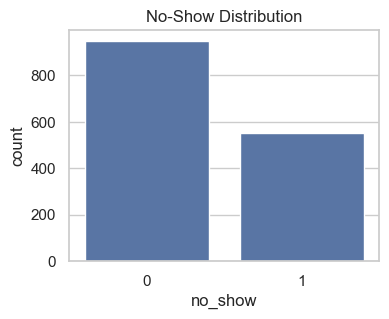

In [12]:
plt.figure(figsize=(4,3))
sns.countplot(x='no_show', data=df)
plt.title("No-Show Distribution")
plt.show()

## C. Numeric vs target

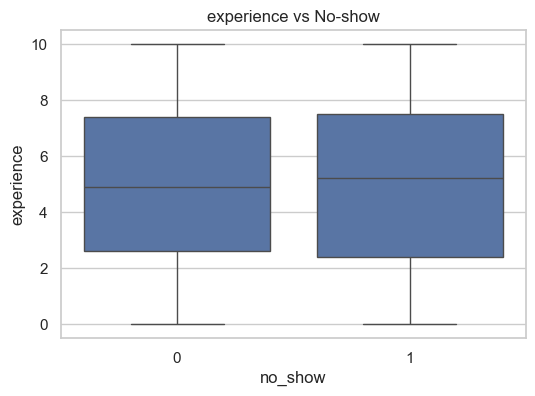

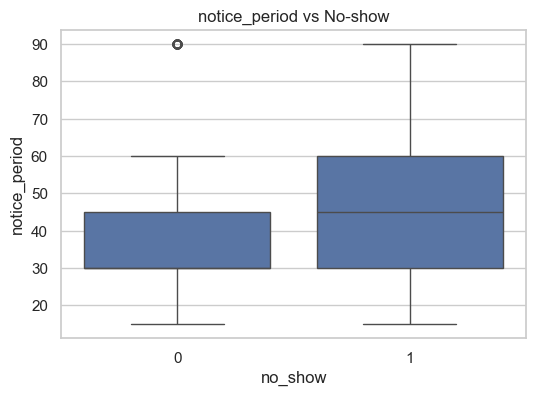

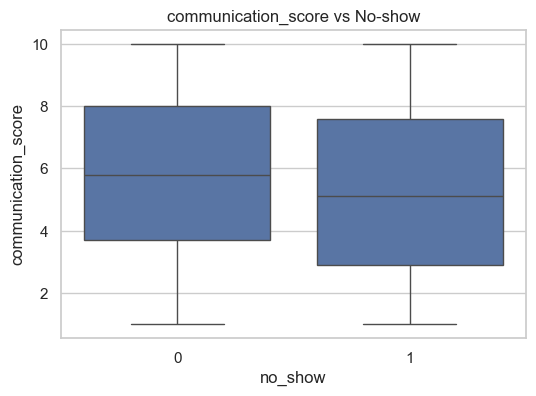

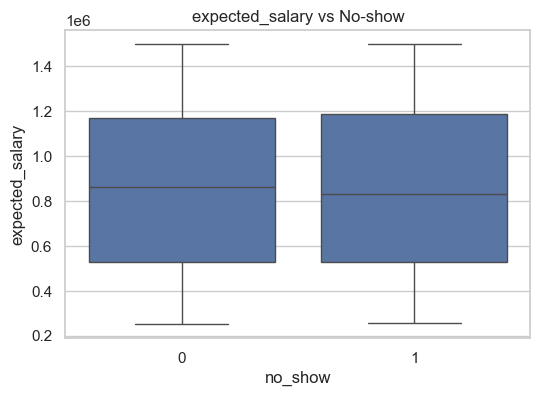

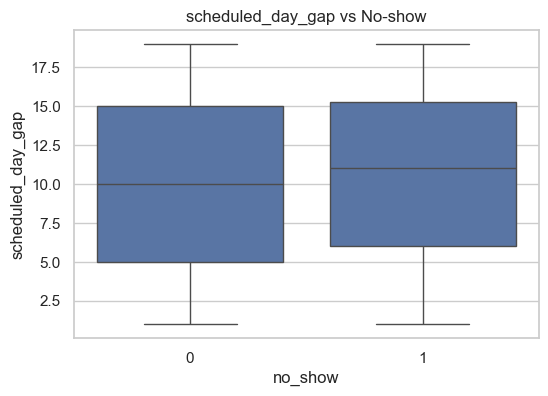

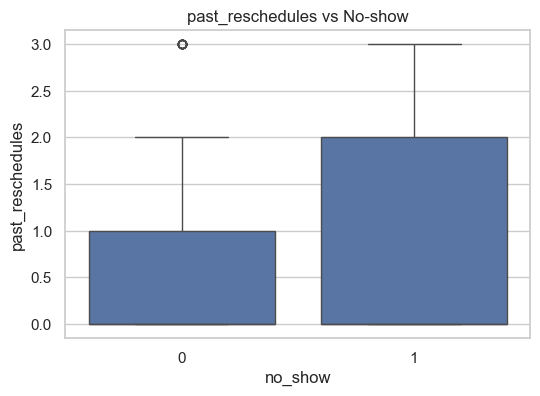

In [13]:
num_cols = ['experience', 'notice_period', 'communication_score',
            'expected_salary', 'scheduled_day_gap', 'past_reschedules']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='no_show', y=col, data=df)
    plt.title(f'{col} vs No-show')
    plt.show()

<h3>Finding From Visualizations : </h3>

<b>Experience vs no_show :</b>
Both groups have almost the same range and median experience, so experience does not clearly affect no-shows.​

<b>Notice_period vs no_show :</b>
No-show candidates usually have a longer notice period and more spread in values, so longer notice may increase no-show risk.​

<b>Scheduled_day_gap vs no_show :</b>
The time gap between scheduling and interview looks similar for both groups, so it does not show a strong effect on no-shows.​

<b>Communication_score vs no_show :</b>
Candidates who attend have a slightly higher communication score, so lower scores might be weakly linked to no-shows.​

<b>Expected_salary vs no_show :</b>
Expected salary is almost the same for both groups, so it does not seem related to no-show behavior.​

<b>Past_reschedules vs no_show :</b>
No-show candidates have higher past_reschedules, meaning candidates who rescheduled more often in the past are more likely to miss the interview.

## D. Categorical vs target (rates)

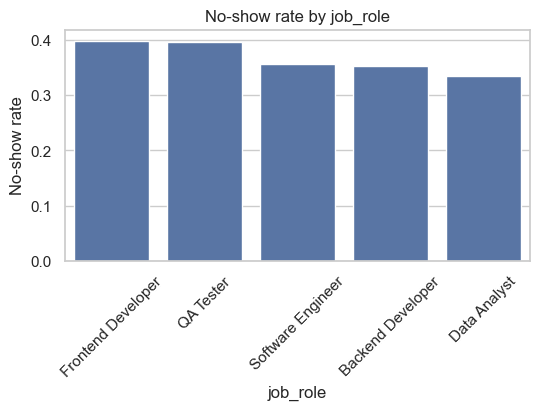

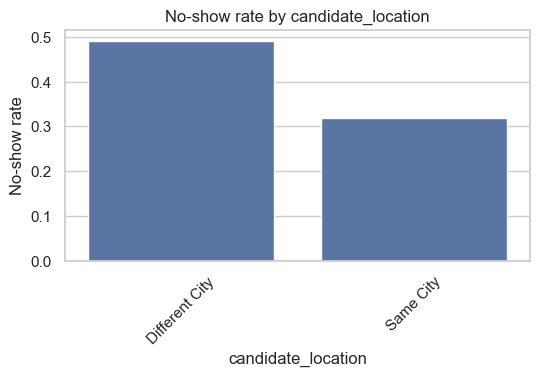

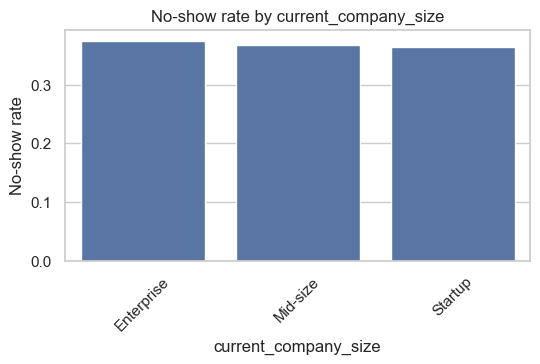

In [14]:
cat_cols = ['job_role', 'candidate_location', 'current_company_size']

for col in cat_cols:
    rate = (df.groupby(col)['no_show']
              .mean()
              .sort_values(ascending=False))
    plt.figure(figsize=(6,3))
    sns.barplot(x=rate.index, y=rate.values)
    plt.xticks(rotation=45)
    plt.ylabel('No-show rate')
    plt.title(f'No-show rate by {col}')
    plt.show()

<h3>Findings : </h3>

<b>Current company size :</b>
Enterprise, Mid‑size, and Startup all have almost the same no‑show rate (around 0.35–0.38), so company size does not seem to change no‑show behavior much.​

<b>Job role :</b>
Frontend Developer and QA Tester have the highest no‑show rates, so candidates in these roles are a bit more likely to miss interviews. Software Engineer and Backend Developer are in the middle, and Data Analyst has the lowest no‑show rate among the roles.​

<b>Candidate location :</b>
Candidates from a different city have a clearly higher no‑show rate (close to 0.5), meaning about half of them do not show up. Candidates from the same city have a lower no‑show rate (around 0.3), so location difference is an important factor in predicting no‑shows.

## E. Correlation heatmap

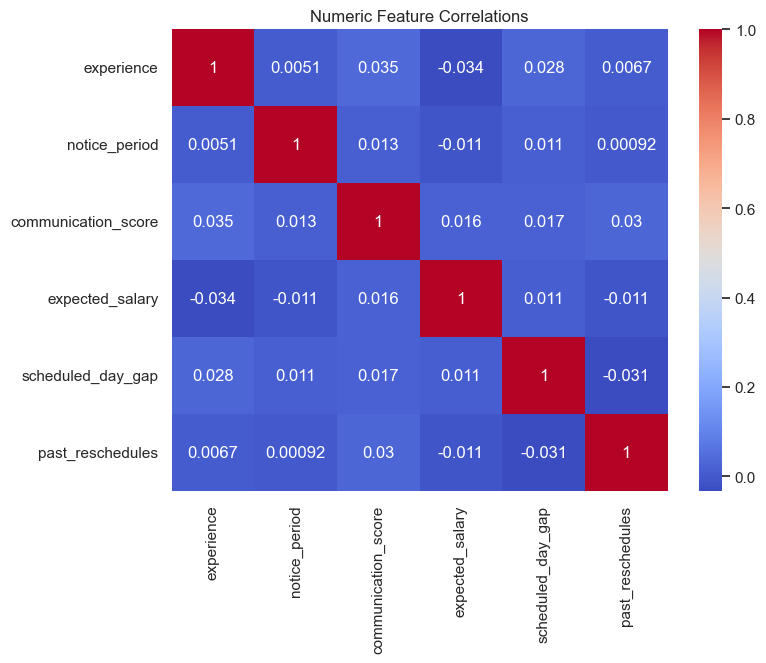

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

In [26]:
df.corr(numeric_only=True)['no_show'].sort_values(ascending=False)

no_show                1.000000
past_reschedules       0.277116
notice_period          0.111727
scheduled_day_gap      0.060690
experience             0.006865
expected_salary       -0.008874
communication_score   -0.089068
Name: no_show, dtype: float64

<h3>Key Findings from Correlation Matrix</h3>
<p>1. past_reschedules and notice_period look like the most promising numeric predictors.</p>
<p>2. Job role and Cadidate location has strong relation with target.</p>

# 2. Data Handling

In [28]:
from sklearn.impute import SimpleImputer
import numpy as np

In [33]:
# --- 1. Robust datetime parsing ---
df['interview_time'] = pd.to_datetime(df['interview_time'], errors='coerce')

# --- 2. Handle missing values ---

# Numeric columns (example list – adjust to your schema)

# As our dataset is clean so we skipped below step.

# num_cols = ['experience', 'notice_period', 'communication_score',
#             'expected_salary', 'scheduled_day_gap', 'past_reschedules',
#             'interview_hour']

# num_imputer = SimpleImputer(strategy='median')
# df[num_cols] = num_imputer.fit_transform(df[num_cols])

# # Categorical columns
# cat_cols = ['job_role', 'candidate_location', 'current_company_size']

# cat_imputer = SimpleImputer(strategy='most_frequent')
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# --- 3. Time-of-day feature (ordered categories) ---

def part_of_day(h):
    if h < 12:
        return 'morning'
    elif h < 17:
        return 'afternoon'
    else:
        return 'evening'

In [41]:
df.drop(columns = ['reschedule_ratio','salary_per_year_exp','notice_gap_diff'],axis=1,inplace=True)

## 3. Data Preprocessing

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# 1. Split first
X = df.drop(columns=['no_show'])
y = df['no_show']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 4. Model Building

In [47]:
# 2. Define columns
num_cols = ['experience', 'notice_period', 'communication_score',
            'expected_salary', 'scheduled_day_gap', 'past_reschedules']

cat_cols = ['job_role', 'candidate_location', 'current_company_size', 'time_of_day']

# 3. Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    # scaler optional for trees, recommended for linear / distance-based models
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# 4. Full model pipeline
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)          # all fitting (imputers, encoders, scaler, model) on train only
score = clf.score(X_test, y_test)  # test is transformed using train-fitted preprocessors

In [48]:
print(score)

0.6866666666666666


## 5. Hyperparameter Tuning

In [62]:
# 4. Full model pipeline
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Define search space for the model inside the pipeline
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
}

rs_rf = RandomizedSearchCV(
    estimator=clf,            # <--- use the pipeline here
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs_rf.fit(X_train, y_train)
print('Best Params:', rs_rf.best_params_)
print('Best Score:', rs_rf.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__max_depth': None}
Best Score: 0.6733333333333333


## 6. Model Evaluation

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       190
           1       0.63      0.34      0.44       110

    accuracy                           0.68       300
   macro avg       0.66      0.61      0.61       300
weighted avg       0.67      0.68      0.65       300

F1: 0.4378698224852071
Precision: 0.6271186440677966
Recall: 0.33636363636363636
ROC AUC: 0.6954545454545455


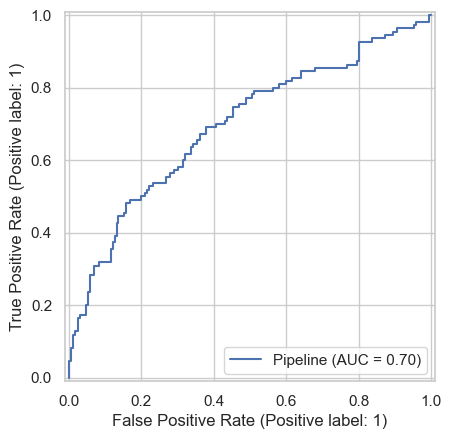

In [63]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

best_model = rs_rf.best_estimator_ if hasattr(rs_rf, "best_estimator_") else rs_rf

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]   # prob of positive class

print(classification_report(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


In [64]:
from sklearn.metrics import confusion_matrix
# Confusion matrix (numbers)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[168  22]
 [ 73  37]]


## 7. Model Pickling

In [65]:
import joblib

best_model = rs_rf.best_estimator_   # this is your full pipeline
joblib.dump(best_model, "no_show_pipeline.joblib")


['no_show_pipeline.joblib']

In [68]:
df['current_company_size'].value_counts()

current_company_size
Mid-size      629
Startup       473
Enterprise    398
Name: count, dtype: int64

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['experience',
                                                   'notice_period',
                                                   'communication_score',
                                                   'expected_salary',
                                                   'scheduled_day_gap',
                                                   'past_reschedules']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_role',
                                                   'candidate_location',
                                                   'current_company_size',
                                                   'time_of_day'])])),
                ('model', RandomForestClassifier(random_state=42))])